In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [41]:
n = 192

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1

dh = 5/(n-1)

T = 8000

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)
print(nt)

8301


In [42]:
uvinitial = np.load('./uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

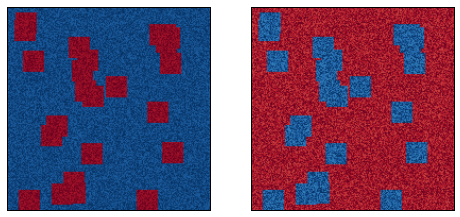

In [43]:
fig = plt.figure(figsize=(8,5))
plt.subplot(121)
plt.imshow(U, cmap = cm.RdBu)
plt.xticks([]), plt.yticks([]);
plt.subplot(122)
plt.imshow(V, cmap = cm.RdBu)
plt.xticks([]), plt.yticks([]);

def solve_u(u, v, Du, F, dt, dh):
    
    u[1:-1,1:-1] = u[1:-1,1:-1] + dt*(((Du/(dh**2))*(u[2:,1:-1] - 4*u[1:-1,1:-1] + u[:-2,1:-1] \
                                           + u[1:-1,2:] + u[1:-1,:-2])) \
    - (u[1:-1,1:-1]*(v[1:-1,1:-1])**2) + F*(1-u[1:-1,1:-1]))
    
    return u

In [44]:
def solve_u(u, v, Du, F, dt, dh):
    
    u1 = u[1:-1,1:-1] + ((Du*dt/(dh**2))*(u[2:,1:-1] - 4*u[1:-1,1:-1] + u[:-2,1:-1] \
                                           + u[1:-1,2:] + u[1:-1,:-2])) \
    - dt*(u[1:-1,1:-1]*(v[1:-1,1:-1])**2) + F*(1-u[1:-1,1:-1])
    
    return u1

def solve_v(u, v, Dv, F, k, dt, dh):
    
    v[1:-1,1:-1] = v[1:-1,1:-1] + dt*(((Dv/(dh**2))*(v[2:,1:-1] - 4*v[1:-1,1:-1] + v[:-2,1:-1] \
                                           + v[1:-1,2:] + v[1:-1,:-2])) \
    - (u[1:-1,1:-1]*(v[1:-1,1:-1])**2) + (F + k)*v[1:-1,1:-1])
    
    return v

In [45]:
def solve_v(u, v, Dv, F, k, dt, dh):
        
    v1 = v[1:-1,1:-1] + ((Dv*dt/(dh**2))*(v[2:,1:-1] - 4*v[1:-1,1:-1] + v[:-2,1:-1] \
                                           + v[1:-1,2:] + v[1:-1,:-2])) \
    + dt*(u[1:-1,1:-1]*(v[1:-1,1:-1])**2) - dt*(F + k)*v[1:-1,1:-1]
    return v1

In [46]:
def ftcs(u, v, Du, Dv, F, k, nt, dt, dh):
    
    for t in range(nt):
        un = u.copy()
        vn = v.copy()
        
        u[1:-1,1:-1] = solve_u(un, vn, Du, F, dt, dh)
        
        v[1:-1,1:-1] = solve_v(un, vn, Dv, F, k, dt, dh)
        
        # Boundary conditions
        u[-1,:] = u[-2,:] #Top Boundary
        u[0,:] = u[1,:]   #Bottom Boundary
        u[:,0] = u[:,1]   #Left Boundary
        u[:,-1] = u[:,-2] #Right Boundary
        v[-1,:] = v[-2,:] #Top Boundary
        v[0,:] = v[1,:]   #Bottom Boundary
        v[:,0] = v[:,1]   #Left Boundary
        v[:,-1] = v[:,-2] #Right Boundary
        
    return u, v

In [47]:
u, v = ftcs(U.copy(), V.copy(), Du, Dv, F, k, nt, dt, dh)

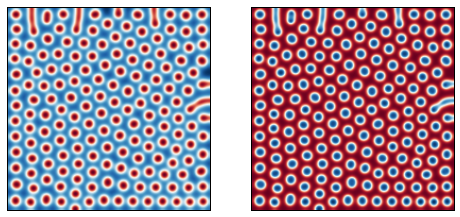

In [48]:
fig = plt.figure(figsize=(8,5))
plt.subplot(121)
plt.imshow(u, cmap = cm.RdBu)
plt.xticks([]), plt.yticks([]);
plt.subplot(122)
plt.imshow(v, cmap = cm.RdBu)
plt.xticks([]), plt.yticks([]);

In [49]:
u[100,::40]

array([ 0.89286194,  0.62738615,  0.84696494,  0.85323788,  0.71719567])

In [50]:
print(nt)

8301


In [51]:
print(dt)

0.9636865765741071


In [52]:
print(dh)

0.02617801047120419
